LINEAR MODEL WITHOUT PYTHON LIBRARIES

In [66]:
# Training data
x_data = [1.0, 2.0, 3.0]
y_data = [3.0, 6.0, 9.0]

# Initial weight
w = 1.0

In [67]:
# Model prediction
def forward(x):
    return x * w

In [68]:
# Loss function (Mean Squared Error)
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

In [69]:
# Gradient of loss w.r.t w
def gradient(x, y):
    return 2 * x * (forward(x) - y)

In [70]:
# Before training prediction
print("Prediction (before training)", 5, forward(5))

Prediction (before training) 5 5.0


In [71]:
# Training loop
for epoch in range(20):                        #This loop trains the model for 10 iterations (called epochs).
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        # print("\tgrad:", x_val, y_val, round(grad, 2))
        l = loss(x_val, y_val)
    print("Progress:", epoch, "w =", round(w, 2), "loss =", round(l, 2))

Progress: 0 w = 1.52 loss = 19.68
Progress: 1 w = 1.91 loss = 10.76
Progress: 2 w = 2.19 loss = 5.88
Progress: 3 w = 2.4 loss = 3.21
Progress: 4 w = 2.56 loss = 1.76
Progress: 5 w = 2.67 loss = 0.96
Progress: 6 w = 2.76 loss = 0.52
Progress: 7 w = 2.82 loss = 0.29
Progress: 8 w = 2.87 loss = 0.16
Progress: 9 w = 2.9 loss = 0.09
Progress: 10 w = 2.93 loss = 0.05
Progress: 11 w = 2.95 loss = 0.03
Progress: 12 w = 2.96 loss = 0.01
Progress: 13 w = 2.97 loss = 0.01
Progress: 14 w = 2.98 loss = 0.0
Progress: 15 w = 2.98 loss = 0.0
Progress: 16 w = 2.99 loss = 0.0
Progress: 17 w = 2.99 loss = 0.0
Progress: 18 w = 2.99 loss = 0.0
Progress: 19 w = 3.0 loss = 0.0


In [72]:
# After training prediction
print("Predicted Score (after training)", "4 hours of studying:", forward(5))

Predicted Score (after training) 4 hours of studying: 14.976201197307649


***Univariate Linear Regression with Gradient Descent***

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# Load data
data = pd.read_csv("ex1data1.txt", header=None)
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values
m = len(Y)  # Number of training examples

In [95]:
# Reshape for matrix operations
X = X[:, np.newaxis]
Y = Y[:, np.newaxis]

In [96]:
# Add intercept term (column of ones)
ones = np.ones((m, 1))
X = np.hstack((ones, X))

In [97]:
# Initialize parameters
theta = np.zeros((2, 1))  # Instead of np.zeroes

In [98]:
# Hyperparameters
epochs = 1500
alpha = 0.01

In [99]:
# Cost function
def computeCost(X, Y, theta):
    predictions = np.dot(X, theta)
    errors = predictions - Y
    return np.sum(errors ** 2) / (2 * m)

In [100]:
# Gradient descent function
def gradientDescent(X, Y, theta, alpha, iterations):
    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - Y
        gradient = np.dot(X.T, errors)
        theta -= (alpha / m) * gradient
    return theta

In [101]:
# Compute initial cost
J = computeCost(X, Y, theta)
print("Initial cost:", J)

Initial cost: 32.072733877455676


In [102]:
# Train model
theta = gradientDescent(X, Y, theta, alpha, epochs)
print("Learned theta:", theta)

Learned theta: [[-3.63029144]
 [ 1.16636235]]


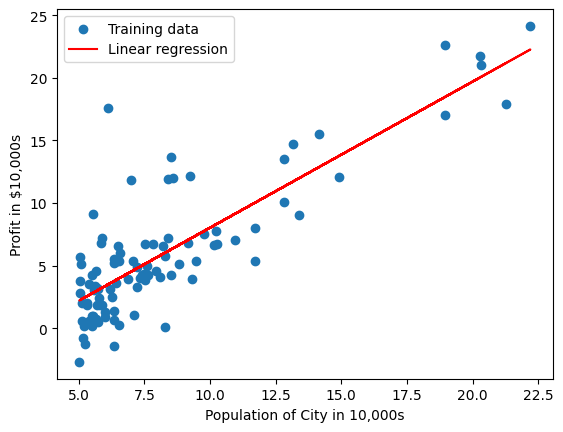

In [103]:
# Plotting
plt.scatter(X[:, 1], Y, label="Training data")
plt.plot(X[:, 1], np.dot(X, theta), color='red', label="Linear regression")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend()
plt.show()